In [51]:
# Import libraries
import pandas as pd

# load the datasets

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# See the first rows of the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# Dataset info
train.info()

# Look for missing values
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

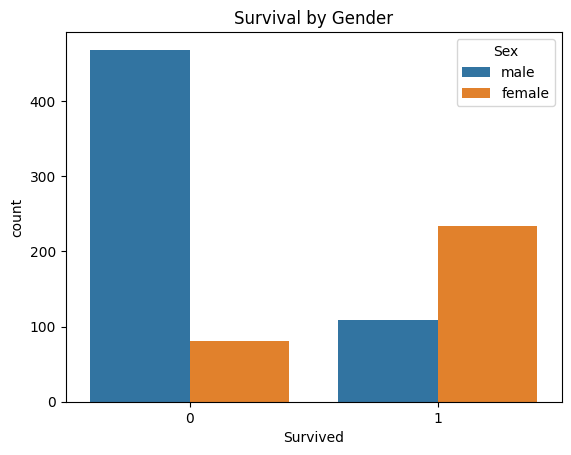

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualise survival by gender
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Survival by Gender")
plt.show()

In [54]:
# Fill missing ages with median age by their respective gender
train['Age'] = train['Age'].fillna(
    train.groupby('Sex')['Age'].transform('median')
)
test['Age'] = test['Age'].fillna(
    test.groupby('Sex')['Age'].transform('median')
)

# Fill missing Embarked by class and gender mode
train['Embarked'] = train['Embarked'].fillna(
    train.groupby(['Pclass', 'Sex'])['Embarked'].transform(lambda x: x.mode()[0])
)
test['Embarked'] = test['Embarked'].fillna(
    test.groupby(['Pclass', 'Sex'])['Embarked'].transform(lambda x: x.mode()[0])
)

In [56]:
# Age binning to categorise ages into groups
bins = [0, 12, 18, 35, 50, 65, 100]
labels = ['child', 'teenager', 'adult', 'middle_aged', 'senior', 'elderly']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)
test['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

# Create feature FamilySize by combining SibSp and Parch
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

#Extract titles from names
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

#Try a Pclass_AgeGroup interaction feature

train['Pclass_Sex'] = train['Pclass'] * train['Sex']
test['Pclass_Sex'] = test['Pclass'] * test['Sex']


#Output the head in its final from
train.head()

# Check again for missing values
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
FamilySize       0
Title            0
Pclass_Sex       0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
FamilySize       0
Title            0
Pclass_Sex       0
dtype: int64


In [58]:
# Fix age binning
test['AgeGroup'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)

# Check if 'Cabin' exists
if 'Cabin' in train.columns:
    train['Deck'] = train['Cabin'].str[0]
    test['Deck'] = test['Cabin'].str[0]

    # Fill missing Deck values with 'Unknown'
    train['Deck'] = train['Deck'].fillna('Unknown')
    test['Deck'] = test['Deck'].fillna('Unknown')

# Impute missing Fares
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Fix Pclass_Sex feature's categorical error
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

train['Pclass_Sex'] = train['Pclass'] * train['Sex']
test['Pclass_Sex'] = test['Pclass'] * test['Sex']


In [59]:
# Check again for missing values
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
FamilySize       0
Title            0
Pclass_Sex       0
Deck             0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeGroup         0
FamilySize       0
Title            0
Pclass_Sex       0
Deck             0
dtype: int64


In [60]:
# Drop the Cabin columns as we have imputed Deck
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Cabin'])


In [61]:
# Check again for missing values
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
FamilySize     0
Title          0
Pclass_Sex     0
Deck           0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
FamilySize     0
Title          0
Pclass_Sex     0
Deck           0
dtype: int64


Train columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title', 'Pclass_Sex', 'AgeGroup_teenager', 'AgeGroup_adult', 'AgeGroup_middle_aged', 'AgeGroup_senior', 'AgeGroup_elderly', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_Unknown', 'AgeGroup', 'FareGroup']
Test columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Title', 'Pclass_Sex', 'AgeGroup_teenager', 'AgeGroup_adult', 'AgeGroup_middle_aged', 'AgeGroup_senior', 'AgeGroup_elderly', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_Unknown', 'Deck_T', 'AgeGroup', 'FareGroup']
Random Forest - Mean: 0.8305 (±0.0251)
Gradient Boosting - Mean: 0.8193 (±0.0318)
XGBoost - Mean: 0.8328 (±0.0277)
Logistic Regression - Mean: 0.7879 (±0.0229)

Best performing model: XGBoost

Top 10 Most Important Features:
         feature  importance
1            Sex    0.296043
0         Pclass    0.123524
22  Deck_Unknown    0.085089
9   

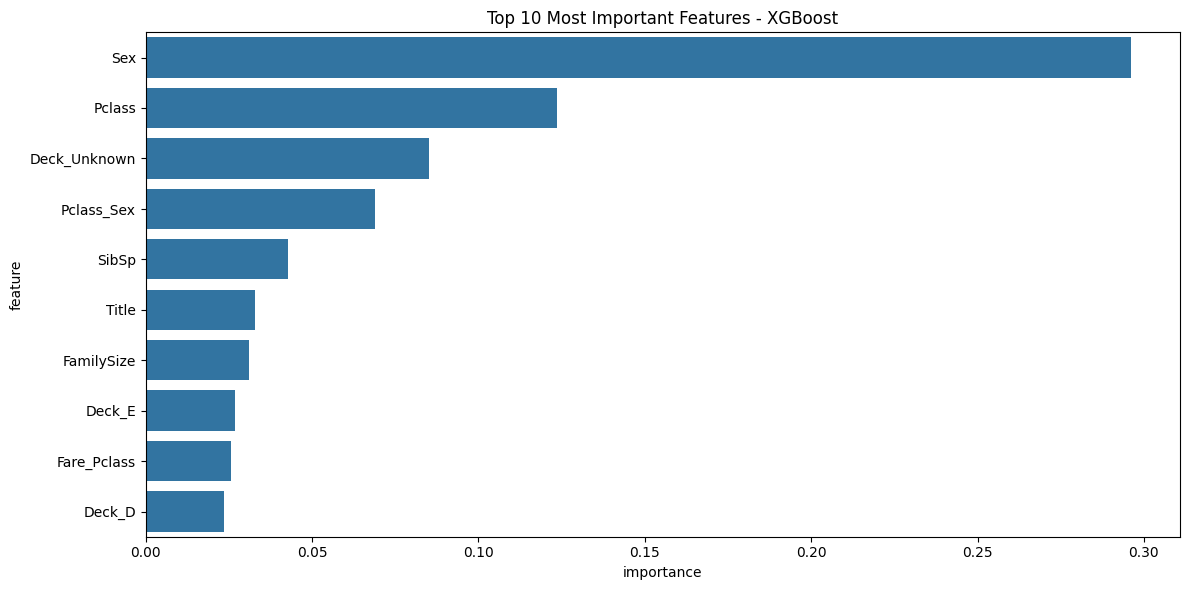

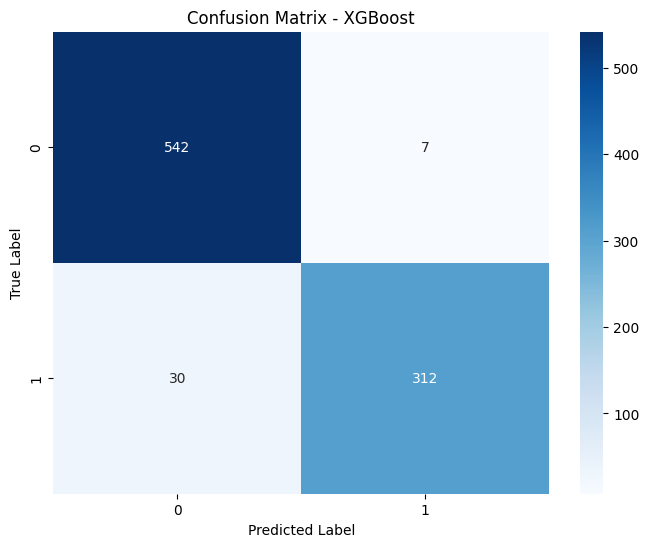


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       549
           1       0.98      0.91      0.94       342

    accuracy                           0.96       891
   macro avg       0.96      0.95      0.96       891
weighted avg       0.96      0.96      0.96       891



In [82]:
# First, let's standardize the titles in both training and test sets
def standardize_titles(title):
    # Dictionary to map various titles to standardized ones
    title_mapping = {
        'Mr': 'Mr',
        'Mrs': 'Mrs',
        'Miss': 'Miss',
        'Master': 'Master',
        'Don': 'Sir',
        'Rev': 'Sir',
        'Dr': 'Officer',
        'Mme': 'Mrs',
        'Ms': 'Miss',
        'Major': 'Officer',
        'Lady': 'Lady',
        'Sir': 'Sir',
        'Mlle': 'Miss',
        'Col': 'Officer',
        'Capt': 'Officer',
        'the Countess': 'Lady',
        'Jonkheer': 'Sir',
        'Dona': 'Lady'
    }
    # Return the standardized title or 'Other' if not found
    return title_mapping.get(title, 'Other')

# Create copies of the data
X_train = train.copy()
X_test = test.copy()

# Standardize titles
X_train['Title'] = X_train['Title'].apply(standardize_titles)
X_test['Title'] = X_test['Title'].apply(standardize_titles)

# Correct age binning for both train and test
bins = [0, 12, 18, 35, 50, 65, 100]
labels = ['child', 'teenager', 'adult', 'middle_aged', 'senior', 'elderly']

# Apply age binning to both datasets
X_train['AgeGroup'] = pd.cut(X_train['Age'], bins=bins, labels=labels, right=False)
X_test['AgeGroup'] = pd.cut(X_test['Age'], bins=bins, labels=labels, right=False)

# Create fare bins
fare_bins = [0, 7.91, 14.454, 31, 513]
fare_labels = ['Low', 'Medium-Low', 'Medium', 'High']

X_train['FareGroup'] = pd.qcut(X_train['Fare'], q=4, labels=fare_labels)
X_test['FareGroup'] = pd.qcut(X_test['Fare'], q=4, labels=fare_labels)

# Drop columns we won't use
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Survived']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Verify columns exist before encoding
print("Train columns:", X_train.columns.tolist())
print("Test columns:", X_test.columns.tolist())

# Initialize label encoders for categorical columns
categorical_columns = ['Title', 'Embarked', 'AgeGroup', 'Deck', 'FareGroup']
label_encoders = {}

# Encode categorical variables
for column in categorical_columns:
    if column in X_train.columns and column in X_test.columns:
        label_encoders[column] = LabelEncoder()
        X_train[column] = label_encoders[column].fit_transform(X_train[column])
        X_test[column] = label_encoders[column].transform(X_test[column])
    else:
        print(f"Warning: {column} not found in one of the datasets")

# Create interaction features
X_train['Age_Pclass'] = X_train['Age'] * X_train['Pclass']
X_test['Age_Pclass'] = X_test['Age'] * X_test['Pclass']

X_train['Fare_Pclass'] = X_train['Fare'] * X_train['Pclass']
X_test['Fare_Pclass'] = X_test['Fare'] * X_test['Pclass']

# Separate target variable
y_train = train['Survived']

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['Age', 'Fare', 'FamilySize', 'Pclass_Sex', 'Age_Pclass', 'Fare_Pclass']
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Align columns between training and test sets
X_train, X_test = X_train.align(X_test, join='inner', axis=1)


# Train multiple models and compare their performance
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import numpy as np

# Dictionary to store model performances
model_performances = {}

# List of models to try
models = {
    'Random Forest': RandomForestClassifier(
        random_state=42, 
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42,
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8
    ),
    'XGBoost': XGBClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42,
        C=1.0,
        max_iter=1000,
        class_weight='balanced'
    )
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model_performances[name] = {
        'mean_score': scores.mean(),
        'std_score': scores.std()
    }
    print(f'{name} - Mean: {scores.mean():.4f} (±{scores.std():.4f})')

# Find the best performing model
best_model_name = max(model_performances.items(), 
                     key=lambda x: x[1]['mean_score'])[0]
print(f"\nBest performing model: {best_model_name}")

# Train the best model on the full training data
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Feature importance analysis
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

# Make predictions on test set
final_predictions = best_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': final_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title(f'Top 10 Most Important Features - {best_model_name}')
plt.tight_layout()
plt.show()

# Model evaluation visualizations
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = best_model.predict(X_train)

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_train, train_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(y_train, train_predictions))

In [83]:
import joblib

# Save the model to a file
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']